### 13.2 数据下载及预处理

In [1]:
import urllib.request
import os
import tarfile

In [2]:
url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
filepath = 'C:/Users/Administrator/Desktop/data/aclImdb_v1.tar.gz'
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

In [3]:
if not os.path.exists('C:/Users/Administrator/Desktop/data/aclImdb'):
    tfile = tarfile.open('C:/Users/Administrator/Desktop/data/aclImdb_v1.tar.gz','r:gz')
    result = tfile.extractall('C:/Users/Administrator/Desktop/data/')

In [4]:
from keras.preprocessing import  sequence
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [5]:
import re 
def rm_tages(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub(' ',text)

import os
def read_files(filetype):
    path = 'C:/Users/Administrator/Desktop/data/aclImdb/'
    file_list = []
    
    positive_path = path + filetype + "/pos/"
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]
        
    negative_path = path + filetype + "/neg/"
    for f in os.listdir(negative_path):
        file_list += [negative_path + f]
        
    print('read',filetype,'files:',len(file_list))
    
    all_labels = ([1] * 12500 + [0] * 12500)
    
    all_texts = []
    for fi in file_list:
        with open(fi,encoding='utf-8') as file_input:
            all_texts += [rm_tages(' '.join(file_input.readlines()))]
            
    return all_labels,all_texts

In [7]:
y_train,train_text = read_files("train")

y_test,test_text = read_files("test")

read train files: 25000


In [9]:
train_text[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [10]:
test_text[0]

"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."

In [11]:
#建立token

token = Tokenizer(num_words=2000)
token.fit_on_texts(train_text)

In [13]:
print(token.document_count)

25000


In [14]:
print(token.word_index)

{"scooby's": 49907, 'thurman\x97she': 65930, 'lackies': 88307, "burr's": 30894, 'nitti': 39413, 'paulo': 15910, 'bind': 21941, 'srbljanovic': 37885, 'swears': 17252, 'immersing': 25759, "laurence's": 56134, "hillbilly's": 70096, 'condescended': 69959, 'monikers': 64778, 'badest': 73690, 'divvied': 64697, 'clinched': 71546, "'pearl": 87437, 'cares\x85\x85\x85\x85': 58723, 'shooked': 76639, 'smacked': 25970, 'gourmands': 84795, 'podalydès': 44667, "fincher's": 47051, 'thau': 70992, 'lavitz': 76082, 'douce': 86347, 'chasity': 62883, 'repenting': 57548, 'socializing': 36545, 'kristy': 18478, 'pregnancy': 10937, 'comprehensibility': 58307, "mantegna's": 73516, "nic's": 49881, "lewis's": 16728, 'homevideo': 72726, "seed's": 30518, 'micah': 42826, 'bearings': 34500, 'infantalising': 76369, 'benet': 10756, 'conklin': 29791, 'nationals': 35836, 'animitronics': 57066, "keaton's": 6877, 'sucessful': 70337, 'pennslyvania': 76790, 'framework': 10439, 'instaneously': 76544, 'lured': 10605, 'thigns':

### 13.6 使用token 将‘影评文字’转换成‘数字列表’

In [15]:
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq = token.texts_to_sequences(test_text)

In [16]:
train_text[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [17]:
x_train_seq[0]

[308,
 6,
 3,
 1068,
 208,
 8,
 29,
 1,
 168,
 54,
 13,
 45,
 81,
 40,
 391,
 109,
 137,
 13,
 57,
 149,
 7,
 1,
 481,
 68,
 5,
 260,
 11,
 6,
 72,
 5,
 631,
 70,
 6,
 1,
 5,
 1,
 1533,
 33,
 66,
 63,
 204,
 139,
 64,
 1229,
 1,
 4,
 1,
 222,
 900,
 28,
 68,
 4,
 1,
 9,
 692,
 2,
 64,
 1533,
 50,
 9,
 215,
 1,
 386,
 7,
 59,
 3,
 1466,
 799,
 5,
 176,
 1,
 391,
 9,
 1236,
 29,
 308,
 3,
 352,
 343,
 142,
 129,
 5,
 27,
 4,
 125,
 1466,
 5,
 308,
 9,
 531,
 11,
 107,
 1467,
 4,
 57,
 554,
 100,
 11,
 308,
 6,
 226,
 47,
 3,
 11,
 8,
 214]

In [18]:
x_train = sequence.pad_sequences(x_train_seq,maxlen=100)
x_test = sequence.pad_sequences(x_test_seq,maxlen=100)

In [19]:
print(x_train_seq[0])

[308, 6, 3, 1068, 208, 8, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 149, 7, 1, 481, 68, 5, 260, 11, 6, 72, 5, 631, 70, 6, 1, 5, 1, 1533, 33, 66, 63, 204, 139, 64, 1229, 1, 4, 1, 222, 900, 28, 68, 4, 1, 9, 692, 2, 64, 1533, 50, 9, 215, 1, 386, 7, 59, 3, 1466, 799, 5, 176, 1, 391, 9, 1236, 29, 308, 3, 352, 343, 142, 129, 5, 27, 4, 125, 1466, 5, 308, 9, 531, 11, 107, 1467, 4, 57, 554, 100, 11, 308, 6, 226, 47, 3, 11, 8, 214]


In [20]:
x_train[0]

array([  29,    1,  168,   54,   13,   45,   81,   40,  391,  109,  137,
         13,   57,  149,    7,    1,  481,   68,    5,  260,   11,    6,
         72,    5,  631,   70,    6,    1,    5,    1, 1533,   33,   66,
         63,  204,  139,   64, 1229,    1,    4,    1,  222,  900,   28,
         68,    4,    1,    9,  692,    2,   64, 1533,   50,    9,  215,
          1,  386,    7,   59,    3, 1466,  799,    5,  176,    1,  391,
          9, 1236,   29,  308,    3,  352,  343,  142,  129,    5,   27,
          4,  125, 1466,    5,  308,    9,  531,   11,  107, 1467,    4,
         57,  554,  100,   11,  308,    6,  226,   47,    3,   11,    8,
        214])

### 14.1 建立多层感知器模型进行IMDb情感分析

In [21]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding

In [22]:
model = Sequential()
model.add(Embedding(output_dim=32,
                    input_dim=2000,
                   input_length=100))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units=1,activation='sigmoid'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               819456    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 883,713
Trainable params: 883,713
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(x=x_train,y=y_train,validation_split=0.2,epochs=10,batch_size=100,verbose=2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 8s - loss: 0.4757 - acc: 0.7596 - val_loss: 0.5232 - val_acc: 0.7516
Epoch 2/10
 - 7s - loss: 0.2717 - acc: 0.8874 - val_loss: 0.6211 - val_acc: 0.7228
Epoch 3/10
 - 7s - loss: 0.1661 - acc: 0.9394 - val_loss: 0.5809 - val_acc: 0.7774
Epoch 4/10
 - 7s - loss: 0.0871 - acc: 0.9700 - val_loss: 0.8460 - val_acc: 0.7422
Epoch 5/10
 - 7s - loss: 0.0479 - acc: 0.9837 - val_loss: 1.0374 - val_acc: 0.7346
Epoch 6/10
 - 8s - loss: 0.0373 - acc: 0.9868 - val_loss: 1.1270 - val_acc: 0.7426
Epoch 7/10
 - 8s - loss: 0.0310 - acc: 0.9893 - val_loss: 1.2121 - val_acc: 0.7408
Epoch 8/10
 - 8s - loss: 0.0284 - acc: 0.9896 - val_loss: 1.5917 - val_acc: 0.7014
Epoch 9/10
 - 7s - loss: 0.0252 - acc: 0.9908 - val_loss: 1.2361 - val_acc: 0.7538
Epoch 10/10
 - 7s - loss: 0.0237 - acc: 0.9916 - val_loss: 1.3432 - val_acc: 0.7530


In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

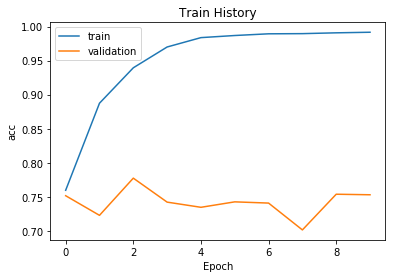

In [26]:
show_train_history(train_history,'acc','val_acc')

In [27]:
scores = model.evaluate(x_test,y_test)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

25000/25000 [==============================] - 2s 96us/step

loss= 0.9686875703492761
accuracy= 0.81132


In [28]:
predict = model.predict_classes(x_test)

In [29]:
predict[:10]

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [30]:
predict_classes = predict.reshape(-1)
predict_classes[:10]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [31]:
SentimentDict={1:'正面的',0:"负面的"}

In [32]:
def display_test_Sentiment(i):
    print(test_text[i])
    print('label的真实值：',SentimentDict[y_test[i]],
         '    预测结果：',SentimentDict[predict_classes[i]])

In [33]:
display_test_Sentiment(1)

Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as "The Greatest Game Ever Played." I'm no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with "Miracle" and "Cinderella Man"), but some how this film was enthralling all the same.  The film starts with some creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO's "Carnivale" and "Rome"), but lumbers along slowly for its first by-the-numbers hour. Once the action moves to the U.S. Open things pick up very well. Paxton does a nice job and shows a knack for effective directorial flourishes (I loved the rain-soaked montage of the action on day two of the open) that propel the plot further or add some unexpected psycholog

In [ ]:
# https://www.imdb.com/title/tt2771200/reviews?sort=helpfulnessScore&dir=desc&ratingFilter=9 评论来自网页
# ps:现在网站上面只有星级  取消了厌恶（Hate it）这种类型的分类了。此条评论来自9星评论

In [38]:
input_text = '''Very much like the cartoon! The singing was really good ... Emma Watson ... what a star! 
The acting was great. I was in two minds about seeing this as it's my favorite fairy story and my favorite Disney cartoon. 
I was in tears at the end, even though I knew the story backwards. 
Why didn't I give it 10 ... The thing that let it down a little for me was the make up of The Beast, I thought it was a little too scary for the film and the wolves were quite a bit nastier than the cartoon version.
Young children may be scared by these things.
'''

In [46]:
input_seq = token.texts_to_sequences([input_text])

In [51]:
print(input_seq)

[[51, 72, 36, 1, 1068, 1, 1115, 12, 62, 48, 47, 3, 319, 1, 112, 12, 83, 9, 12, 7, 103, 40, 315, 10, 13, 41, 57, 510, 61, 2, 57, 510, 907, 1068, 9, 12, 7, 1670, 29, 1, 126, 56, 147, 9, 692, 1, 61, 134, 157, 9, 198, 8, 154, 1, 151, 11, 383, 8, 176, 3, 113, 14, 68, 12, 1, 93, 52, 4, 1, 9, 193, 8, 12, 3, 113, 95, 625, 14, 1, 18, 2, 1, 67, 175, 3, 223, 70, 1, 1068, 306, 181, 472, 199, 26, 1760, 30, 130, 179]]


In [48]:
pad_input_seq = sequence.pad_sequences(input_seq,maxlen=100)

In [49]:
len(pad_input_seq)

1

In [50]:
pad_input_seq

array([[   0,    0,   51,   72,   36,    1, 1068,    1, 1115,   12,   62,
          48,   47,    3,  319,    1,  112,   12,   83,    9,   12,    7,
         103,   40,  315,   10,   13,   41,   57,  510,   61,    2,   57,
         510,  907, 1068,    9,   12,    7, 1670,   29,    1,  126,   56,
         147,    9,  692,    1,   61,  134,  157,    9,  198,    8,  154,
           1,  151,   11,  383,    8,  176,    3,  113,   14,   68,   12,
           1,   93,   52,    4,    1,    9,  193,    8,   12,    3,  113,
          95,  625,   14,    1,   18,    2,    1,   67,  175,    3,  223,
          70,    1, 1068,  306,  181,  472,  199,   26, 1760,   30,  130,
         179]])

In [52]:
predict_result = model.predict_classes(pad_input_seq)

In [53]:
predict_result

array([[1]])

In [54]:
SentimentDict[predict_result[0][0]]

'正面的'

In [66]:
#整合函数
def predict_review(input_text_v2):
    input_seq = token.texts_to_sequences([input_text])
    pad_input_seq = sequence.pad_sequences(input_seq,maxlen=100)
    predict_result = model.predict_classes(pad_input_seq)
    print(SentimentDict[predict_result[0][0]])

In [67]:
predict_review('''
Where do I start. This adaptation of Disney's 1991 Beauty and the Beast was an utter disappointment.
Emma Watson as Belle was extremely unconvincing from the start to the end. She had the same expressions as the actress from Twilight.
The animators did a terrible job with the Beast. He looked fake and lifeless. 
They could have used special makeup to create the beast similar to the Grinch where we get to see Jim Carrey's expressions. 
The side character animations were poorly executed. Overall I felt the film was rushed as there was lack of compassion and chemistry between the characters. 
There was a lot of CGI and green screen which could have been replaced by normal acting, because then why make an animated version of an animated film.
This is by far the worst remake of an animated classic.
''')

正面的


### 14.11 文字处理时使用较大的字典提取更多文字

In [68]:
token_v2 = Tokenizer(num_words=3800)
token_v2.fit_on_texts(train_text)

In [69]:
x_train_seq_v2 = token.texts_to_sequences(train_text)
x_test_seq_v2 = token.texts_to_sequences(test_text)

In [70]:
x_train_v2 = sequence.pad_sequences(x_train_seq_v2,maxlen=380)
x_test_v2 = sequence.pad_sequences(x_test_seq_v2,maxlen=380)

In [71]:
model_v2 = Sequential()
model_v2.add(Embedding(output_dim=32,
                    input_dim=3800,
                   input_length=380))
model_v2.add(Dropout(0.2))
model_v2.add(Flatten())
model_v2.add(Dense(units=256,activation='relu'))
model_v2.add(Dropout(0.2))
model_v2.add(Dense(units=1,activation='sigmoid'))

In [73]:
print(model_v2.summary())
model_v2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model_v2.fit(x=x_train_v2,y=y_train,validation_split=0.2,epochs=10,batch_size=100,verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12160)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3113216   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 3,235,073
Trainable params: 3,235,073
Non-trainable params: 0
_________________________________________________________________


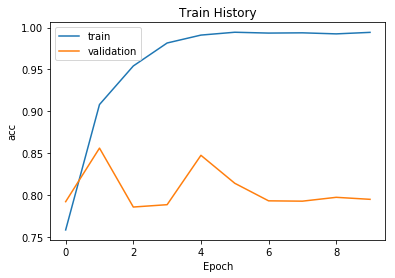

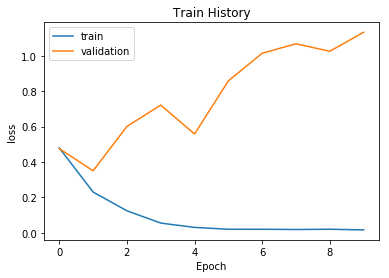

In [74]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [76]:
scores = model_v2.evaluate(x_test_v2,y_test)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

25000/25000 [==============================] - 7s 268us/step

loss= 0.8176806120289862
accuracy= 0.8418
